<a href="https://colab.research.google.com/github/pefura/IFPERA/blob/main/Exercice_semaine_6_data_correction_class_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Exercice  semaine 6-data
- Date limite de soumission des réponses: vendredi  28 avril 2023 à 12h
- Discussion en ligne : Samedi  29 avril 2023 à 18h
- Thématiques abordées :   Classification en  machine learning

- Instructions : Utilisez Python pour traiter les questions. Aucune autre application logicielle n’est acceptée pour l’analyse des données. Il est souhaitable de fournir votre éditeur de codes annoté avec votre devoir. Vous devez recopier chaque question avec les points affectés et nommer votre fichier.
- La base des données de santé respiratoire dans la population générale camerounaise vous a été confiée et est disponible au format csv à l’adresse  URL :
https://raw.githubusercontent.com/pefura/IFPERA-data-science/main/ESR_EFR_GLOBAL_DAL_sauvegarde_race_neutral_other.csv
- Les variables d’intérêt sont consignées dans le tableau de codage suivant :

| Variables | Codes | Commentaires | Nom de codes à donner après importation de la base |
| --- | --- | --- | --- |
| SEXE_REC | 1=masculin, 2=féminin |  | sex |
| Age | / | En années | age |
| I.3_plus_haut_niveau_education_en_tranches | 1= non scolarisé, 2= primaire, 3=secondaire, 4= universitaire |  | education |
| TOUX_CHRONIQUE_REC | 1= oui, 2=non |  | chronic_cough |
| dyspnea_any | 0= non, 1=oui |  | dyspnea |
| III.1_avezvousdéjaeula_tuberculose | 1= oui, 2=non | Tuberculose pulmonaire | past_tuberculosis |
| II_siflements_durant_12_derniers_mois | 1= oui, 2=non |  | wheezing |
| CUISSON_TYP_COMBUST_REC | 1= exposés à la biomasse, 2= non exposé à la biomasse |  | biomass |
| TABAC_RECC | 1= fumeur, 2=non-fumeur | Tabagisme | smoking |
| SPO2 | / | Saturation transcutanée en oxygène en % | spo2 |
| Bmi_copd | / | Indice de masse corporelle en kg/m2 | bmi |
| OLD | 0= non, 1=oui |  | old |


In [29]:
# Importer les libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
# Ignorer les avertissements FutureWarning
warnings.filterwarnings(action='ignore', category=FutureWarning)

## **Base des données et prétraitement des données**

In [2]:
URL = "https://raw.githubusercontent.com/pefura/IFPERA-data-science/main/ESR_EFR_GLOBAL_DAL_sauvegarde_race_neutral_other.csv"
dataset=pd.read_csv(URL)
dataset.head(5)

,Unnamed: 0,NUM_ORDRE,GROUPE,Numéro_sujet,SEXE_REC,Age,Age_Rec,I.3_plus_haut_niveau_education_en_tranches,CATEGORIE_PROFESS_REC,Ethnicity_rec,...,FEV75FVC_LLN_other,ratio_VEMS_FEV1_LLN_CLF,ratio_VEMS_FEV1_LLN_other_neutral,difference_VEMS_FEV1_LLN_CLF,difference_VEMS_FEV1_LLN_other,impaired_FEV1_CLF,impaired_FEV1_GLI_other_neutral,impaired_FEV1_class,BPCO,OLD
0,0,1724,2,1206,1,96,3,1.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2397,2,2783,1,73,3,2.0,1.0,2.0,...,NaN,0.495229,0.325753,-0.693103,-1.407472,1.0,1.0,2.0,NaN,1.0
2,2,1782,2,1323,2,43,2,1.0,3.0,2.0,...,NaN,0.692928,0.509135,-0.571666,-1.243708,1.0,1.0,2.0,NaN,1.0
3,3,2181,2,2325,1,43,2,3.0,2.0,2.0,...,NaN,0.781909,0.572214,-0.510426,-1.368102,1.0,1.0,2.0,NaN,1.0
4,4,4614,4,7112466,2,54,2,1.0,3.0,3.0,...,NaN,0.814285,0.586231,-0.230352,-0.712872,1.0,1.0,2.0,NaN,1.0


In [3]:
dataset.shape

(5055, 167)

In [4]:
# Données d'intérêt
col = ['SEXE_REC','Age','I.3_plus_haut_niveau_education_en_tranches','TOUX_CHRONIQUE_REC','dyspnea_any','III.1_avezvousdéjaeula_tuberculose',
'II_siflements_durant_12_derniers_mois','CUISSON_TYP_COMBUST_REC','TABAC_RECC','SPO2','bmi_copd','OLD']
data = dataset[col]
data.shape

(5055, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5055 entries, 0 to 5054
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   SEXE_REC                                    5055 non-null   int64  
 1   Age                                         5055 non-null   int64  
 2   I.3_plus_haut_niveau_education_en_tranches  5051 non-null   float64
 3   TOUX_CHRONIQUE_REC                          5055 non-null   int64  
 4   dyspnea_any                                 5055 non-null   int64  
 5   III.1_avezvousdéjaeula_tuberculose          5053 non-null   float64
 6   II_siflements_durant_12_derniers_mois       5055 non-null   int64  
 7   CUISSON_TYP_COMBUST_REC                     5055 non-null   int64  
 8   TABAC_RECC                                  5055 non-null   int64  
 9   SPO2                                        3585 non-null   float64
 10  bmi_copd    

## **1.	Renommer les variables d’intérêt tel que spécifier dans la dernière colonne du tableau de codage et nommer la base obtenue « data » (5 pts)**

In [6]:
new_name = ['sex','age','education','chronic_cough','dyspnea','past_tuberculosis','wheezing','biomass','smoking','spo2','bmi','old']
data.columns = new_name
data.columns

Index(['sex', 'age', 'education', 'chronic_cough', 'dyspnea',
       'past_tuberculosis', 'wheezing', 'biomass', 'smoking', 'spo2', 'bmi',
       'old'],
      dtype='object')

In [7]:
data.head()

,sex,age,education,chronic_cough,dyspnea,past_tuberculosis,wheezing,biomass,smoking,spo2,bmi,old
0,1,96,1.0,2,0,2.0,2,1,2,71.0,25.711662,NaN
1,1,73,2.0,1,1,2.0,2,1,1,76.0,23.407509,1.0
2,2,43,1.0,2,0,2.0,1,1,1,71.0,31.020408,1.0
3,1,43,3.0,1,0,2.0,2,1,1,90.0,24.755464,1.0
4,2,54,1.0,2,0,2.0,2,1,2,NaN,20.811655,1.0


### **Mise en conformité de la Typologie des variables**

In [37]:
data.loc[:,new_name] = data.astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5055 entries, 0 to 5054
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sex                5055 non-null   category
 1   age                5055 non-null   category
 2   education          5051 non-null   category
 3   chronic_cough      5055 non-null   category
 4   dyspnea            5055 non-null   category
 5   past_tuberculosis  5053 non-null   category
 6   wheezing           5055 non-null   category
 7   biomass            5055 non-null   category
 8   smoking            5055 non-null   category
 9   spo2               3585 non-null   category
 10  bmi                5052 non-null   category
 11  old                5054 non-null   category
dtypes: category(12)
memory usage: 150.0 KB


In [44]:
data.loc[:, ['age', 'bmi', 'spo2']] = data.loc[:, ['age', 'bmi', 'spo2']].astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5055 entries, 0 to 5054
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sex                5055 non-null   category
 1   age                5055 non-null   float64 
 2   education          5051 non-null   category
 3   chronic_cough      5055 non-null   category
 4   dyspnea            5055 non-null   category
 5   past_tuberculosis  5053 non-null   category
 6   wheezing           5055 non-null   category
 7   biomass            5055 non-null   category
 8   smoking            5055 non-null   category
 9   spo2               3585 non-null   float64 
 10  bmi                5052 non-null   float64 
 11  old                5054 non-null   category
dtypes: category(9), float64(3)
memory usage: 164.2 KB


In [45]:
# Correction des données mal importées
data.loc[:, "education"] = data["education"].cat.rename_categories(['1','2', '3','4'])
data.loc[:, "past_tuberculosis"] = data["past_tuberculosis"].cat.rename_categories(['1','2'])
data.loc[:, "old"] = data["old"].cat.rename_categories(['0','1'])
data.head()

,sex,age,education,chronic_cough,dyspnea,past_tuberculosis,wheezing,biomass,smoking,spo2,bmi,old
0,1,96.0,1,2,0,2,2,1,2,71.0,25.711662,NaN
1,1,73.0,2,1,1,2,2,1,1,76.0,23.407509,1
2,2,43.0,1,2,0,2,1,1,1,71.0,31.020408,1
3,1,43.0,3,1,0,2,2,1,1,90.0,24.755464,1
4,2,54.0,1,2,0,2,2,1,2,NaN,20.811655,1


## **Traiter la variable d'intérêt old**

In [59]:
# Supprimer les données manquantes sur old
data_old = data.dropna(subset=['old'])
data_old.shape

(5054, 12)

## **2.	Faire une analyse exploratoire des données (10 pts)**

In [47]:
data_old.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5054 entries, 1 to 5054
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sex                5054 non-null   category
 1   age                5054 non-null   float64 
 2   education          5050 non-null   category
 3   chronic_cough      5054 non-null   category
 4   dyspnea            5054 non-null   category
 5   past_tuberculosis  5052 non-null   category
 6   wheezing           5054 non-null   category
 7   biomass            5054 non-null   category
 8   smoking            5054 non-null   category
 9   spo2               3584 non-null   float64 
 10  bmi                5051 non-null   float64 
 11  old                5054 non-null   category
dtypes: category(9), float64(3)
memory usage: 203.5 KB


In [48]:
data_old['old'].value_counts()

old
0    4704
1     350
Name: count, dtype: int64

In [50]:
round((data_old['old'].value_counts()/len(data_old))*100, 2)

old
0    93.07
1     6.93
Name: count, dtype: float64

### **2.1 Données catégorielles**

Analysis for column: sex
Unique values: 2
sex
2    2774
1    2280
Name: count, dtype: int64
Normalized
sex
2    0.548872
1    0.451128
Name: proportion, dtype: float64
Missing values: 0




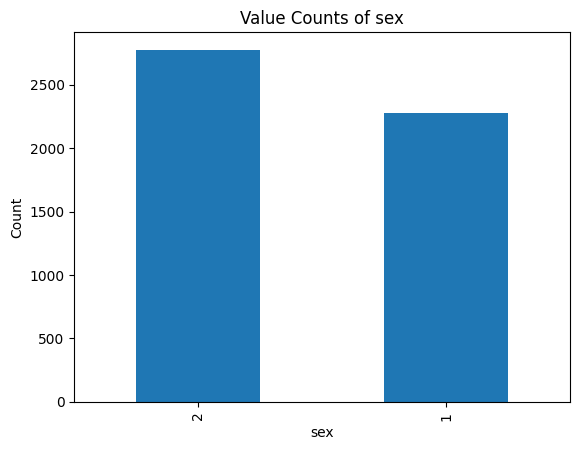

Analysis for column: education
Unique values: 4
education
3    2185
2    1226
4     999
1     640
Name: count, dtype: int64
Normalized
education
3    0.432673
2    0.242772
4    0.197822
1    0.126733
Name: proportion, dtype: float64
Missing values: 4




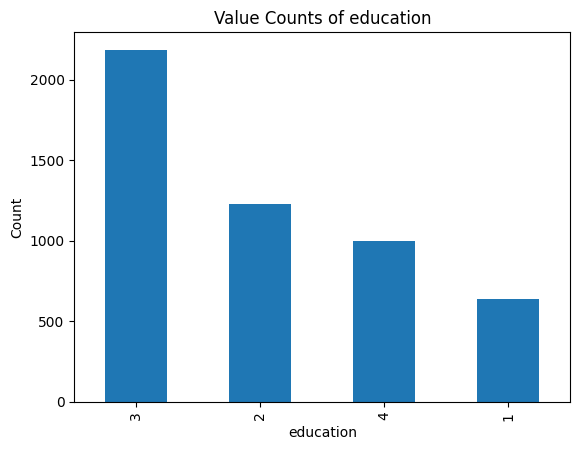

Analysis for column: chronic_cough
Unique values: 2
chronic_cough
2    4955
1      99
Name: count, dtype: int64
Normalized
chronic_cough
2    0.980412
1    0.019588
Name: proportion, dtype: float64
Missing values: 0




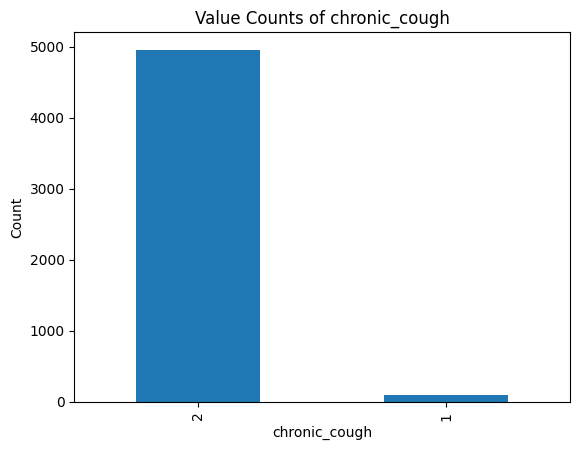

Analysis for column: dyspnea
Unique values: 2
dyspnea
0    4109
1     945
Name: count, dtype: int64
Normalized
dyspnea
0    0.813019
1    0.186981
Name: proportion, dtype: float64
Missing values: 0




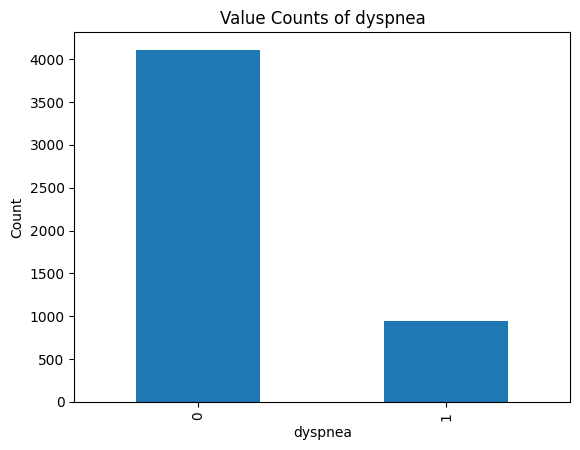

Analysis for column: past_tuberculosis
Unique values: 2
past_tuberculosis
2    4917
1     135
Name: count, dtype: int64
Normalized
past_tuberculosis
2    0.973278
1    0.026722
Name: proportion, dtype: float64
Missing values: 2




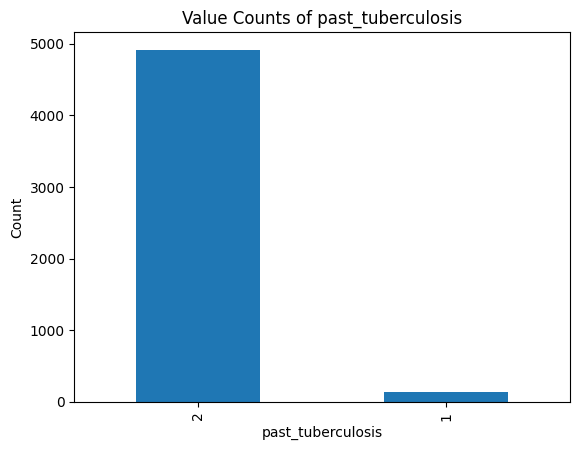

Analysis for column: wheezing
Unique values: 2
wheezing
2    4910
1     144
Name: count, dtype: int64
Normalized
wheezing
2    0.971508
1    0.028492
Name: proportion, dtype: float64
Missing values: 0




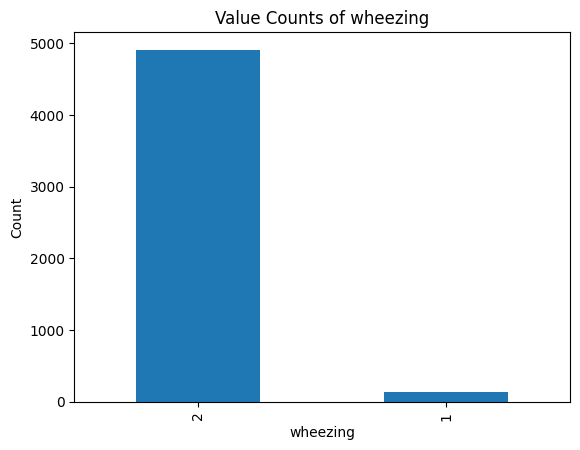

Analysis for column: biomass
Unique values: 2
biomass
1    3497
2    1557
Name: count, dtype: int64
Normalized
biomass
1    0.691927
2    0.308073
Name: proportion, dtype: float64
Missing values: 0




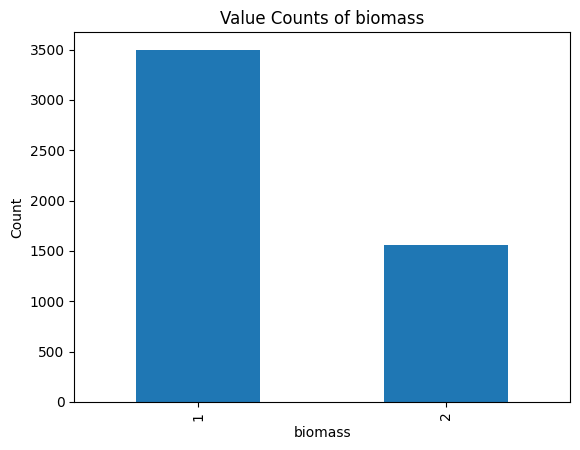

Analysis for column: smoking
Unique values: 2
smoking
2    4210
1     844
Name: count, dtype: int64
Normalized
smoking
2    0.833004
1    0.166996
Name: proportion, dtype: float64
Missing values: 0




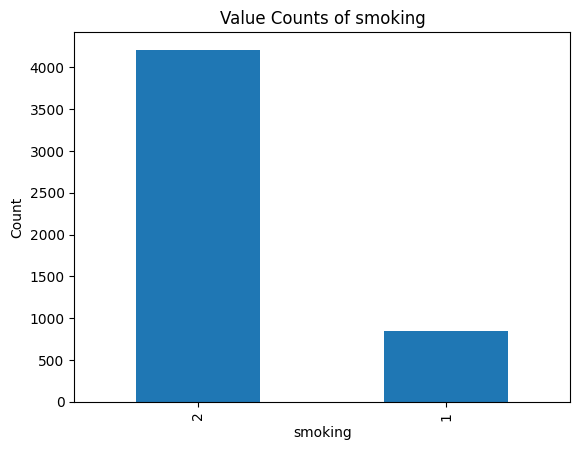

Analysis for column: old
Unique values: 2
old
0    4704
1     350
Name: count, dtype: int64
Normalized
old
0    0.930748
1    0.069252
Name: proportion, dtype: float64
Missing values: 0




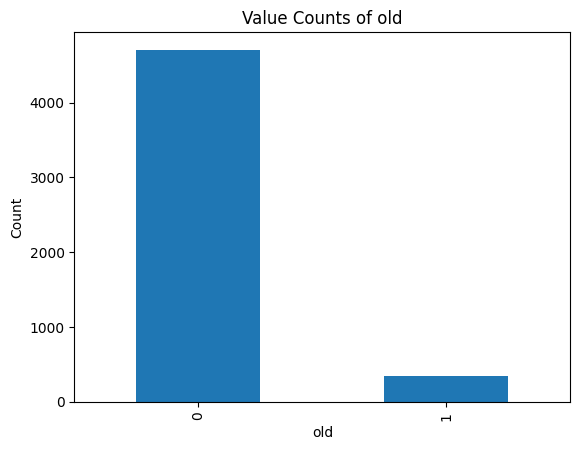

In [51]:
# Select categorical columns
cat_col = data_old.select_dtypes(include=['object', 'category'])

# Analyze each categorical column
for col in cat_col .columns:
    print(f"Analysis for column: {col}")
    print(f"Unique values: {cat_col [col].nunique()}")
    print(cat_col [col].value_counts())

    print("Normalized")
    print(cat_col [col].value_counts(normalize = True))
    print(f"Missing values: {cat_col[col].isnull().sum()}")
    print("\n")

    # Plot value counts
    cat_col [col].value_counts().plot(kind='bar')
    plt.title(f"Value Counts of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### **2.2. Données numériques**

In [60]:
# Description numérique
data_old.describe()

,age,spo2,bmi
count,5054.000000,3584.000000,5051.000000
mean,44.284131,92.768415,27.233733
std,16.238549,10.214990,5.778973
min,19.000000,26.000000,13.984008
25%,30.000000,90.000000,23.120624
50%,43.000000,97.000000,26.297578
75%,56.000000,99.000000,30.469636
max,95.000000,128.000000,60.444444


In [61]:
# Correction de SPO2 < = 100
# Replace values greater than 100 with 100 using boolean indexing
data_old.loc[data_old['spo2'] > 100, 'spo2'] = 100
data_old.describe()

,age,spo2,bmi
count,5054.000000,3584.000000,5051.000000
mean,44.284131,92.564453,27.233733
std,16.238549,9.942973,5.778973
min,19.000000,26.000000,13.984008
25%,30.000000,90.000000,23.120624
50%,43.000000,97.000000,26.297578
75%,56.000000,99.000000,30.469636
max,95.000000,100.000000,60.444444


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'spo2'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

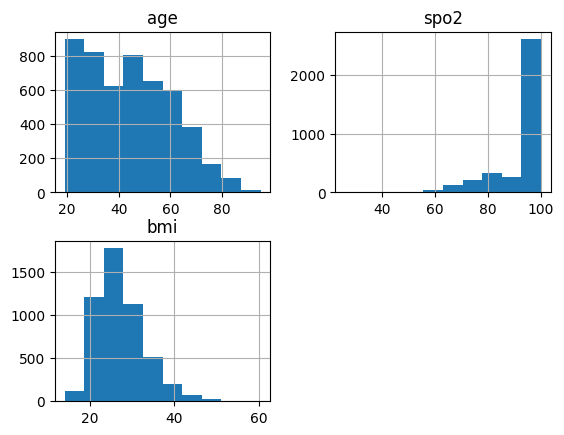

In [57]:
num_col = data_old.select_dtypes(include =['float'])
num_col.hist()

### **2.3 Utilisation de tableone**

In [73]:
#pip install tableone
from tableone import TableOne
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
# Create TableOne
mytable = TableOne(data=data_old, columns = list(data_old.columns), categorical = list(cat_col)[:-1], nonnormal= list(num_col), groupby='old', pval = True)

# Print TableOne
mytable

Grouped by old                                                              
                                  Missing           Overall                 0                 1 P-Value
n                                                      5054              4704               350        
sex, n (%)               1              0       2280 (45.1)       2133 (45.3)        147 (42.0)   0.247
                         2                      2774 (54.9)       2571 (54.7)        203 (58.0)        
age, median [Q1,Q3]                     0  43.0 [30.0,56.0]  43.0 [29.0,56.0]  48.0 [37.2,61.0]  <0.001
education, n (%)         1              4        640 (12.7)        550 (11.7)         90 (25.8)  <0.001
                         2                      1226 (24.3)       1119 (23.8)        107 (30.7)        
                         3                      2185 (43.3)       2063 (43.9)        122 (35.0)        
                         4                       999 (19.8)        969 (20.6)          30 (8.6)        
chronic_cough, n (%)     1              0          99 (2.0)          78 (1.7)          21 (6.0)  <0.001
                         2                      4955 (98.0)       4626 (98.3)        329 (94.0)        
dyspnea, n (%)           0              0       4109 (81.3)       3845 (81.7)        264 (75.4)   0.004
                         1                       945 (18.7)        859 (18.3)         86 (24.6)        
past_tuberculosis, n (%) 1              2         135 (2.7)         108 (2.3)          27 (7.7)  <0.001
                         2                      4917 (97.3)       4594 (97.7)        323 (92.3)        
wheezing, n (%)          1              0         144 (2.8)         113 (2.4)          31 (8.9)  <0.001
                         2                      4910 (97.2)       4591 (97.6)        319 (91.1)        
biomass, n (%)           1              0       3497 (69.2)       3208 (68.2)        289 (82.6)  <0.001
                         2                      1557 (30.8)       1496 (31.8)         61 (17.4)        
smoking, n (%)           1              0        844 (16.7)        767 (16.3)         77 (22.0)   0.007
                         2                      4210 (83.3)       3937 (83.7)        273 (78.0)        
spo2, median [Q1,Q3]                 1470  97.0 [90.0,99.0]  98.0 [91.0,99.0]  96.0 [80.0,98.0]  <0.001
bmi, median [Q1,Q3]                     3  26.3 [23.1,30.5]  26.4 [23.2,30.7]  25.1 [22.0,28.0]  <0.001

In [75]:
print(mytable.tabulate(tablefmt = "fancy_grid"))

╒══════════════════════════╤════╤═══════════╤══════════════════╤══════════════════╤══════════════════╤═══════════╕
│                          │    │ Missing   │ Overall          │ 0                │ 1                │ P-Value   │
╞══════════════════════════╪════╪═══════════╪══════════════════╪══════════════════╪══════════════════╪═══════════╡
│ n                        │    │           │ 5054             │ 4704             │ 350              │           │
├──────────────────────────┼────┼───────────┼──────────────────┼──────────────────┼──────────────────┼───────────┤
│ sex, n (%)               │ 1  │ 0         │ 2280 (45.1)      │ 2133 (45.3)      │ 147 (42.0)       │ 0.247     │
├──────────────────────────┼────┼───────────┼──────────────────┼──────────────────┼──────────────────┼───────────┤
│                          │ 2  │           │ 2774 (54.9)      │ 2571 (54.7)      │ 203 (58.0)       │           │
├──────────────────────────┼────┼───────────┼──────────────────┼────────────────

## **3.	Définir un pipeline permettant de traiter simultanément toutes les colonnes des variables explicatives en appliquant  un encodage one hot sur les variables qualitatives et une normalisation robuste sur les variables quantitatives (10pts)**

In [76]:
# Defining target(y) and features (X)
y = data_old['old']
X = data_old.drop(columns =['old'])

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (5054, 11)
y shape: (5054,)


In [77]:
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
# On doit encoder les variables qualitatives en numérique[oui/non en 1/0] et pour certains algorithmes il
# est nécessaire de normaliser les données
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer


In [78]:
X.dtypes

sex                  category
age                   float64
education            category
chronic_cough        category
dyspnea              category
past_tuberculosis    category
wheezing             category
biomass              category
smoking              category
spo2                  float64
bmi                   float64
dtype: object

In [79]:
numerical_features = selector(dtype_exclude="category")(X)
categorical_features = selector(dtype_include="category")(X)
#categorical_pipeline = make_pipeline(SimpleImputer(strategy='constant', fill_value= "unknown"), OneHotEncoder())


print("numerical_features:", numerical_features)
print("categorical_features:", categorical_features)


numerical_features: ['age', 'spo2', 'bmi']
categorical_features: ['sex', 'education', 'chronic_cough', 'dyspnea', 'past_tuberculosis', 'wheezing', 'biomass', 'smoking']


In [80]:
numerical_pipeline = make_pipeline(SimpleImputer(strategy='median'), RobustScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown = "ignore"))
categorical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])

In [81]:
# final pipeline
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                   (categorical_pipeline, categorical_features))
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['age', 'spo2', 'bmi']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'education', 'chronic_cough',
                                  'dyspnea', 'past_tuberculosis', 'wheezing',
                                  'biomass', 'smoking'])])

In [82]:
X_scaled = preprocessor.fit_transform(X)
X_scaled.shape

(5054, 21)

In [83]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.153846,-10.5,-0.393307,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.000000,-13.0,0.642726,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.000000,-3.5,-0.209865,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.423077,0.0,-0.746574,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.346154,-1.0,0.953632,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,-0.500000,1.0,-0.672045,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5050,1.615385,-11.0,0.231681,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
5051,-0.192308,0.0,0.133935,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
5052,0.346154,-11.5,-0.503164,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


## **4.	Utiliser une technique de validation croisée pour choisir les hyperparamètres optimaux (le score AUC-ROC sera choisi pour l’optimisation) des différents modèles le cas échéant (10 pts)**

In [84]:
# Example, import a module to split dataset in train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                    stratify=y, random_state=0 )

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4043, 11)
y_train shape: (4043,)
X_test shape: (1011, 11)
y_test shape: (1011,)


In [85]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_train_scaled.shape

(4043, 21)

In [86]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
# Recherche des hyperparamètres optimaux: KNN
from sklearn.model_selection import RandomizedSearchCV
# Définir la plage des hyperparamètres
distributions = dict(n_neighbors=np.arange(1,100))

# Configurer la recherche aléatoire
Rand_CV = RandomizedSearchCV(KNN_model, distributions, random_state=0, scoring = 'roc_auc')
search =  Rand_CV.fit(X_train_scaled, y_train)

search.best_params_  # Meilleurs paramètres

{'n_neighbors': 56}

In [89]:
KNN_model_final = KNeighborsClassifier(n_neighbors=56)

In [87]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier (random_state=0)

# Recherche des hyperparamètres optimaux: random Forest
from sklearn.model_selection import RandomizedSearchCV
# Définir la plage des hyperparamètres
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))

# Configurer la recherche aléatoire
Rand_CV = RandomizedSearchCV(RF_model, distributions, random_state=0, scoring = 'roc_auc')
search =  Rand_CV.fit(X_train_scaled, y_train)

search.best_params_  # Meilleurs paramètres

{'n_estimators': 113, 'max_depth': 9}

In [106]:
RF_model_final= RandomForestClassifier(max_depth=9, n_estimators=113, random_state = 0)

In [90]:
# Calcul du score obtenu durant la validation croisée pour le modèle de KNN avce les hyperparamètres optimaux
from sklearn.model_selection import cross_val_score

cross_validation = 5
score_auc_final_KNN = cross_val_score(KNN_model_final, X_train_scaled, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds AUC final KNN')
print(score_auc_final_KNN)
print('Mean CV AUC final KNN:', '{:.3f}'.format(score_auc_final_KNN.mean()))
print('standard deviation CV AUC final KNN:', '{:.3f}'.format(np.std(score_auc_final_KNN)))
print("UPPER 95% CI of AUC:", score_auc_final_KNN.mean() - 1.96*np.std(score_auc_final_KNN))


score folds AUC final KNN
[0.67706555 0.7348819  0.68987147 0.68083919 0.69006459]
Mean CV AUC final KNN: 0.695
standard deviation CV AUC final KNN: 0.021
UPPER 95% CI of AUC: 0.6537844359324887


In [93]:
# Calcul du score obtenu durant la validation croisée pour le modèle de RF avce les hyperparamètres optimaux
from sklearn.model_selection import cross_val_score

cross_validation =10
score_auc_final_RF = cross_val_score(RF_model_final, X_train_scaled, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds AUC final Random Forest')
print(score_auc_final_RF)
print('Mean CV AUC final RF:', '{:.3f}'.format(score_auc_final_RF.mean()))
print('standard deviation CV AUC final RF:', '{:.3f}'.format(np.std(score_auc_final_RF)))
print("LOWER 95% CI of AUC:", score_auc_final_RF.mean() - 1.96*np.std(score_auc_final_RF))
print("UPPER 95% CI of AUC:", score_auc_final_RF.mean() + 1.96*np.std(score_auc_final_RF))

score folds AUC final Random Forest
[0.78296703 0.67478211 0.7234748  0.77393617 0.78125    0.73394757
 0.66280395 0.73575228 0.67638678 0.73328267]
Mean CV AUC final RF: 0.728
standard deviation CV AUC final RF: 0.042
LOWER 95% CI of AUC: 0.6450328173796144
UPPER 95% CI of AUC: 0.8106838568119316


## **5.	Tracer les courbes d’apprentissage pour les différents modèles optimaux et interpréter ces courbes. Il est conseillé d’inclure les 2 courbes sur le même graphique (10 pts)**

In [94]:
# Learning curve of RF
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

N, train_score_RF, val_score_RF = learning_curve(RF_model_final, X_train_scaled, y_train,  scoring='roc_auc',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

N_final, train_score_KNN, val_score_KNN = learning_curve(KNN_model_final, X_train_scaled, y_train,  scoring='roc_auc',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

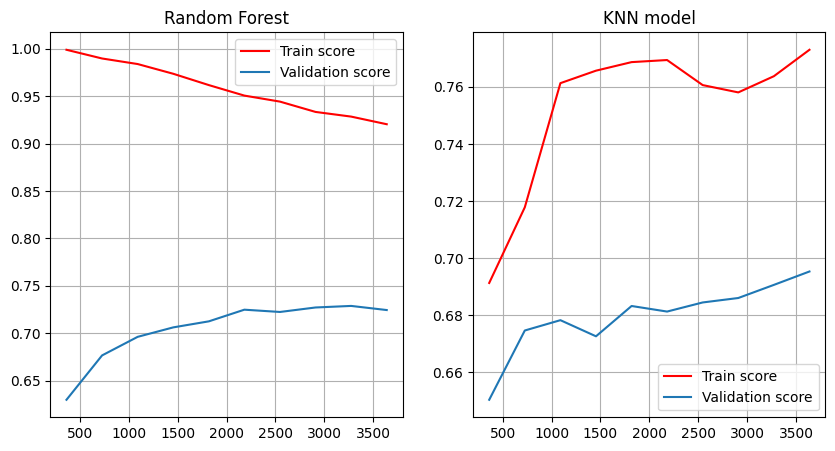

In [95]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2, figsize=(10, 5))

# For Random Forest
axis[0].plot(N, train_score_RF.mean(axis=1), color = "red")
axis[0].plot(N, val_score_RF.mean(axis=1))
axis[0].set_title("Random Forest")
axis[0].legend(['Train score', 'Validation score'])
axis[0].grid(visible = None)
# For KNN
axis[1].plot(N_final,train_score_KNN.mean(axis=1), color = "red")
axis[1].plot(N_final, val_score_KNN.mean(axis=1))
axis[1].set_title("KNN model")
axis[1].legend(['Train score', 'Validation score'])
axis[1].grid(visible = None)

## **6.	Définir une fonction d’évaluation vous permettant de calculer les différentes métriques de classification dans le test set (20 pts)**

In [96]:
def evaluation(model, X_train = X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    model.fit(X_train, y_train)
    # Importer les modules nécessaires pour le calcul des métriques
    from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
    from imblearn.metrics import specificity_score
    # Prédictions sur les données du test set
    ypred = model.predict(X_test)
    # Calcul de l'AUC et spécificité
    model_probs = model.predict_proba(X_test)
    model_probs = model_probs[:, 1]
    model_auc = roc_auc_score(y_test, model_probs)
    spe = specificity_score(y_test, ypred, average=None)
    # Matrice de confuson et scores associés dont F1
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print("SPECIFICITY")
    print(spe)
    print("AUROC")
    print(model_auc)

In [97]:
X_test_scaled = preprocessor.transform(X_test)
evaluation(model=KNN_model_final, X_train = X_train_scaled, X_test=X_test_scaled)

CONFUSION MATRIX
[[941   0]
 [ 70   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       941
           1       0.00      0.00      0.00        70

    accuracy                           0.93      1011
   macro avg       0.47      0.50      0.48      1011
weighted avg       0.87      0.93      0.90      1011

SPECIFICITY
[0. 1.]
AUROC
0.6199483831789889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
evaluation(model=RF_model_final, X_train = X_train_scaled, X_test=X_test_scaled)

CONFUSION MATRIX
[[941   0]
 [ 69   1]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       941
           1       1.00      0.01      0.03        70

    accuracy                           0.93      1011
   macro avg       0.97      0.51      0.50      1011
weighted avg       0.94      0.93      0.90      1011

SPECIFICITY
[0.01428571 1.        ]
AUROC
0.68398360406862


## **Equilibrer les données**

In [99]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


In [100]:
# define oversampling strategy
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

In [102]:
from collections import Counter
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train_over))

Counter({'0': 3763, '1': 3763})


In [ ]:
#from sklearn.model_selection import train_test_split
#X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over,test_size=0.2,
#                                                  random_state=0 )

In [103]:
X_train_over_scaled = preprocessor.fit_transform(X_train_over)
X_test_scaled = preprocessor.transform(X_test)

In [128]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier (random_state=0)

# Recherche des hyperparamètres optimaux: random Forest
from sklearn.model_selection import RandomizedSearchCV
# Définir la plage des hyperparamètres
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))

# Configurer la recherche aléatoire
Rand_CV = RandomizedSearchCV(RF_model, distributions, random_state=0, scoring = 'roc_auc')
search =  Rand_CV.fit(X_train_over_scaled, y_train_over)

search.best_params_  # Meilleurs paramètres

{'n_estimators': 599, 'max_depth': 9}

In [130]:
# RF
RF_model_final_over= RandomForestClassifier(max_depth=9, n_estimators=599, random_state = 0)
evaluation(model=RF_model_final_over, X_train = X_train_over_scaled, y_train=y_train_over, X_test=X_test_scaled, y_test=y_test)

CONFUSION MATRIX
[[779 162]
 [ 41  29]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       941
           1       0.15      0.41      0.22        70

    accuracy                           0.80      1011
   macro avg       0.55      0.62      0.55      1011
weighted avg       0.89      0.80      0.84      1011

SPECIFICITY
[0.41428571 0.82784272]
AUROC
0.6570062243813571


In [109]:
# KNN
evaluation(model=KNN_model_final,  X_train = X_train_over_scaled, y_train=y_train_over, X_test=X_test_scaled, y_test=y_test)

CONFUSION MATRIX
[[635 306]
 [ 39  31]]
              precision    recall  f1-score   support

           0       0.94      0.67      0.79       941
           1       0.09      0.44      0.15        70

    accuracy                           0.66      1011
   macro avg       0.52      0.56      0.47      1011
weighted avg       0.88      0.66      0.74      1011

SPECIFICITY
[0.44285714 0.67481403]
AUROC
0.5816684378320935


In [111]:
# Learning curve of RF
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

N, train_score_RF_over, val_score_RF_over = learning_curve(RF_model_final, X_train_over_scaled, y_train_over,  scoring='accuracy',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

N_final, train_score_KNN_over, val_score_KNN_over = learning_curve(KNN_model_final, X_train_over_scaled, y_train_over,  scoring='accuracy',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

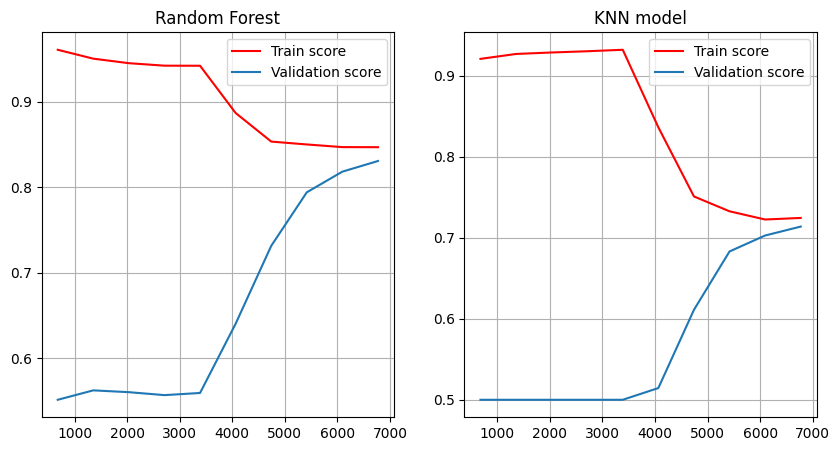

In [112]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2, figsize=(10, 5))

# For Random Forest
axis[0].plot(N, train_score_RF_over.mean(axis=1), color = "red")
axis[0].plot(N, val_score_RF_over.mean(axis=1))
axis[0].set_title("Random Forest")
axis[0].legend(['Train score', 'Validation score'])
axis[0].grid(visible = None)
# For KNN
axis[1].plot(N_final,train_score_KNN_over.mean(axis=1), color = "red")
axis[1].plot(N_final, val_score_KNN_over.mean(axis=1))
axis[1].set_title("KNN model")
axis[1].legend(['Train score', 'Validation score'])
axis[1].grid(visible = None)

## **8.	Prédire l’existence de l’obstruction bronchique  chez les sujets dont les caractéristiques sont consignées dans le tableau unseen_data disponible à l’adresse URL : https://raw.githubusercontent.com/pefura/IFPERA-data-science/main/unseen_data_old.csv (15 pts**

In [113]:
# Data unseen
path_unseen = "https://raw.githubusercontent.com/pefura/IFPERA-data-science/main/unseen_data_old.csv "
unseen = pd.read_csv(path_unseen, sep =";")
unseen

,sex,age,education,chronic_cough,dyspnea,past_tuberculosis,wheezing,biomass,smoking,spo2,bmi
0,1,80.0,2,1.0,1.0,2,2.0,1,1,76.0,23.407509
1,2,43.0,1,2.0,0.0,2,1.0,21,1,71.0,31.020408
2,1,50.0,2,1.0,NaN,2,2.0,1,1,90.0,24.755464
3,2,54.0,1,2.0,1.0,2,2.0,1,2,NaN,20.811655
4,2,52.0,2,2.0,0.0,1,NaN,2,2,95.0,33.304989
5,1,41.0,3,2.0,0.0,2,2.0,1,2,99.0,17.000000
6,2,79.0,1,1.0,1.0,2,2.0,1,2,69.0,21.303949
7,1,56.0,1,2.0,0.0,1,1.0,2,1,98.0,17.239048
8,2,50.0,1,NaN,0.0,2,2.0,1,2,58.0,27.471384
9,2,45.0,1,2.0,1.0,2,2.0,1,2,99.0,27.343750


In [114]:
unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                10 non-null     int64  
 1   age                10 non-null     float64
 2   education          10 non-null     int64  
 3   chronic_cough      9 non-null      float64
 4   dyspnea            9 non-null      float64
 5   past_tuberculosis  10 non-null     int64  
 6   wheezing           9 non-null      float64
 7   biomass            10 non-null     int64  
 8   smoking            10 non-null     int64  
 9   spo2               9 non-null      float64
 10  bmi                10 non-null     float64
dtypes: float64(6), int64(5)
memory usage: 1008.0 bytes


In [115]:
col_2 = unseen.columns
col_2

Index(['sex', 'age', 'education', 'chronic_cough', 'dyspnea',
       'past_tuberculosis', 'wheezing', 'biomass', 'smoking', 'spo2', 'bmi'],
      dtype='object')

In [116]:
unseen[['sex', 'age', 'education', 'chronic_cough', 'dyspnea',
       'past_tuberculosis', 'wheezing', 'biomass', 'smoking', 'spo2', 'bmi']]= unseen[['sex', 'age', 'education', 'chronic_cough', 'dyspnea',
       'past_tuberculosis', 'wheezing', 'biomass', 'smoking', 'spo2', 'bmi']].astype('category')
unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sex                10 non-null     category
 1   age                10 non-null     category
 2   education          10 non-null     category
 3   chronic_cough      9 non-null      category
 4   dyspnea            9 non-null      category
 5   past_tuberculosis  10 non-null     category
 6   wheezing           9 non-null      category
 7   biomass            10 non-null     category
 8   smoking            10 non-null     category
 9   spo2               9 non-null      category
 10  bmi                10 non-null     category
dtypes: category(11)
memory usage: 2.3 KB


In [117]:
unseen[['age',  'spo2', 'bmi']]= unseen[['age','spo2', 'bmi']].astype('float')
unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sex                10 non-null     category
 1   age                10 non-null     float64 
 2   education          10 non-null     category
 3   chronic_cough      9 non-null      category
 4   dyspnea            9 non-null      category
 5   past_tuberculosis  10 non-null     category
 6   wheezing           9 non-null      category
 7   biomass            10 non-null     category
 8   smoking            10 non-null     category
 9   spo2               9 non-null      float64 
 10  bmi                10 non-null     float64 
dtypes: category(8), float64(3)
memory usage: 1.4 KB


In [118]:
# Correction des données
unseen["chronic_cough"] = unseen["chronic_cough"].cat.rename_categories(['1','2'])
unseen["dyspnea"] = unseen["dyspnea"].cat.rename_categories(['1','2'])
unseen["wheezing"] = unseen["wheezing"].cat.rename_categories(['1','2'])

In [122]:
unseen

,sex,age,education,chronic_cough,dyspnea,past_tuberculosis,wheezing,biomass,smoking,spo2,bmi
0,1,80.0,2,1,2,2,2,1,1,76.0,23.407509
1,2,43.0,1,2,1,2,1,21,1,71.0,31.020408
2,1,50.0,2,1,NaN,2,2,1,1,90.0,24.755464
3,2,54.0,1,2,2,2,2,1,2,NaN,20.811655
4,2,52.0,2,2,1,1,NaN,2,2,95.0,33.304989
5,1,41.0,3,2,1,2,2,1,2,99.0,17.000000
6,2,79.0,1,1,2,2,2,1,2,69.0,21.303949
7,1,56.0,1,2,1,1,1,2,1,98.0,17.239048
8,2,50.0,1,NaN,1,2,2,1,2,58.0,27.471384
9,2,45.0,1,2,2,2,2,1,2,99.0,27.343750


In [131]:
# Prédiction
X_unseen_scaled = preprocessor.transform(unseen)
pred = RF_model_final_over.predict(X_unseen_scaled)
pred

array(['1', '0', '1', '0', '0', '0', '0', '0', '1', '0'], dtype=object)

In [132]:
pred_1 = pd.DataFrame(pred)
pred_1.columns = ["prediction"]
pred_1.head(3)

,prediction
0,1
1,0
2,1


In [133]:
# Probalilité de prédiction
probabilite = RF_model_final.predict_proba(X_unseen_scaled)
probabilite = pd.DataFrame(probabilite)
probabilite.columns = ["probabilté not OLD", "probabilté OLD"]
probabilite

,probabilté not OLD,probabilté OLD
0,0.463547,0.536453
1,0.599902,0.400098
2,0.447083,0.552917
3,0.566167,0.433833
4,0.743382,0.256618
5,0.569750,0.430250
6,0.516082,0.483918
7,0.759486,0.240514
8,0.493021,0.506979
9,0.594069,0.405931


In [134]:
# Tableau de prédictions et probabilité avec unseen data.
unseen_pred = pd.concat([unseen,pred_1, probabilite], axis=1)
unseen_pred

,sex,age,education,chronic_cough,dyspnea,past_tuberculosis,wheezing,biomass,smoking,spo2,bmi,prediction,probabilté not OLD,probabilté OLD
0,1,80.0,2,1,2,2,2,1,1,76.0,23.407509,1,0.463547,0.536453
1,2,43.0,1,2,1,2,1,21,1,71.0,31.020408,0,0.599902,0.400098
2,1,50.0,2,1,NaN,2,2,1,1,90.0,24.755464,1,0.447083,0.552917
3,2,54.0,1,2,2,2,2,1,2,NaN,20.811655,0,0.566167,0.433833
4,2,52.0,2,2,1,1,NaN,2,2,95.0,33.304989,0,0.743382,0.256618
5,1,41.0,3,2,1,2,2,1,2,99.0,17.000000,0,0.569750,0.430250
6,2,79.0,1,1,2,2,2,1,2,69.0,21.303949,0,0.516082,0.483918
7,1,56.0,1,2,1,1,1,2,1,98.0,17.239048,0,0.759486,0.240514
8,2,50.0,1,NaN,1,2,2,1,2,58.0,27.471384,1,0.493021,0.506979
9,2,45.0,1,2,2,2,2,1,2,99.0,27.343750,0,0.594069,0.405931
